In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/ML_tutorial/AB_NYC_2019.csv")
data.drop(["id","host_id"],axis=1,inplace=True)
data.isna().sum()/len(data)  #  همه دیتا ها کمتر از 50 درصد انها nan هست
# میخواهیم دیتا هایی که بیشتر از 50 درصد انها خالی است را حذف کنیم که هیچ دریتایی این ویژگی را ندارد

data.fillna(data._get_numeric_data().mean(),inplace=True)#پر کردن داده های خالی عددی با میانگین همان ستون
data.isna().sum()
data["host_name"].value_counts()

Mounted at /content/drive


Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [3]:
print(len(data[data["last_review"].isna()]))
data.drop("last_review",axis=1,inplace=True)#last_review حذف دیتای 


10052


In [4]:
print(data["neighbourhood_group"].value_counts().values[0])
columns=data.columns
for col in columns:
  
  if data[col].dtype=="object" or data[col].dtype=="object":
    print(col)
    data[col].fillna(data[col].value_counts().values[0],inplace=True)# پرکردن داده های غیر عددی خالی با بیشترین فراوانی از همان ستون
data.isna().sum()
data["host_name"].value_counts()

21661
name
host_name
neighbourhood_group
neighbourhood
room_type


Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11453, dtype: int64

In [5]:
# use encoder and one hot encoder
from sklearn.preprocessing import LabelEncoder#  neighbourhood ایجاد یک انکدر روی ستون
# و تبدیل این دیتای غیر عددی به دیتای عددی

data["neighbourhood"]=LabelEncoder().fit_transform(data["neighbourhood"])

In [6]:
dummies_features=pd.get_dummies(data[["neighbourhood_group","room_type"]])# ایجاد یک وان هات انکدر روی ستون های غیر عددی باقی مانده
# one hot encoder
dummies_features
new_data=pd.concat([data,dummies_features],axis=1)# ادغام دیتاست اصلی با دیتای غیر عددی که به عددی تبدیل کریدم
new_data.drop(["neighbourhood_group","room_type"],axis=1,inplace=True)# حذف دیتاهای غیر عددی که انها را به عدد تبدیل کردیم و با دیتای اصلی ادغام کردیم
new_data

,name,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,John,108,40.64749,-73.97237,149,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,Skylit Midtown Castle,Jennifer,127,40.75362,-73.98377,225,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,94,40.80902,-73.94190,150,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,LisaRoxanne,41,40.68514,-73.95976,89,1,270,4.640000,1,194,0,1,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,Laura,61,40.79851,-73.94399,80,10,9,0.100000,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,13,40.67853,-73.94995,70,2,0,1.373221,2,9,0,1,0,0,0,0,1,0
48891,Affordable room in Bushwick/East Williamsburg,Marisol,28,40.70184,-73.93317,40,4,0,1.373221,2,36,0,1,0,0,0,0,1,0
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,94,40.81475,-73.94867,115,10,0,1.373221,1,27,0,0,1,0,0,1,0,0
48893,43rd St. Time Square-cozy single bed,Taz,95,40.75751,-73.99112,55,1,0,1.373221,6,2,0,0,1,0,0,0,0,1


In [7]:


from scipy.stats import zscore  # برای حذف داده های پرت (اگر قدر مطلق این پارامتر کمتر از 3 باشد ان دیتا دیتای پرت نیست در غیر این صورت داده پرت تلقی میشود)

number_data=new_data[new_data.columns[2:]]
print(new_data.shape)
z_scores = zscore(number_data)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

new_data = new_data[filtered_entries]


new_data.reset_index(inplace=True)

new_data.drop("index",axis=1,inplace=True)
print(new_data.shape)
new_data


(48895, 19)
(42299, 19)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,John,108,40.64749,-73.97237,149,1,9,0.210000,6,365,0,1,0,0,0,0,1,0
1,Skylit Midtown Castle,Jennifer,127,40.75362,-73.98377,225,1,45,0.380000,2,355,0,0,1,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,94,40.80902,-73.94190,150,3,0,1.373221,1,365,0,0,1,0,0,0,1,0
3,Entire Apt: Spacious Studio/Loft by central park,Laura,61,40.79851,-73.94399,80,10,9,0.100000,1,0,0,0,1,0,0,1,0,0
4,Large Cozy 1 BR Apartment In Midtown East,Chris,137,40.74767,-73.97500,200,3,74,0.590000,1,129,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42294,"Spacious Room w/ Private Rooftop, Central loca...",Kat,95,40.76392,-73.99183,125,4,0,1.373221,1,31,0,0,1,0,0,0,1,0
42295,Charming one bedroom - newly renovated rowhouse,Sabrina,13,40.67853,-73.94995,70,2,0,1.373221,2,9,0,1,0,0,0,0,1,0
42296,Affordable room in Bushwick/East Williamsburg,Marisol,28,40.70184,-73.93317,40,4,0,1.373221,2,36,0,1,0,0,0,0,1,0
42297,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,94,40.81475,-73.94867,115,10,0,1.373221,1,27,0,0,1,0,0,1,0,0


48895
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


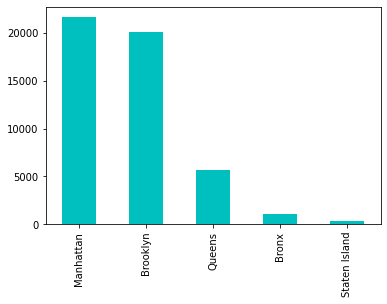

In [8]:
import matplotlib.pyplot as plt
print(data.shape[0]) # تعداد اگهی ها

print(data["neighbourhood_group"].value_counts())# تعداد اگهی در منطقه جغرافیایی

data["neighbourhood_group"].value_counts().plot.bar(color="c")# رسم تعداد اگهی در منطقه

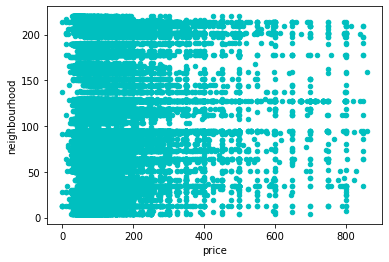

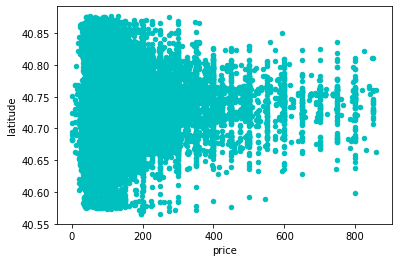

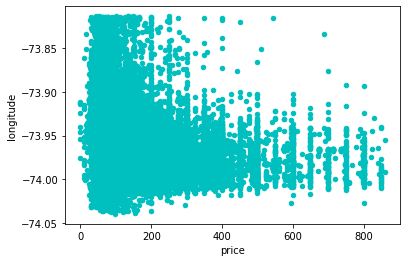

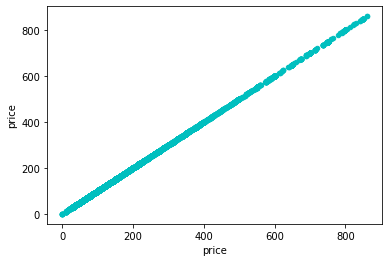

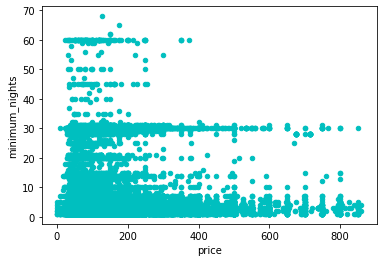

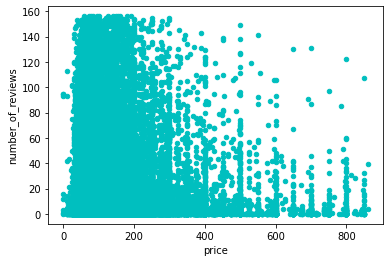

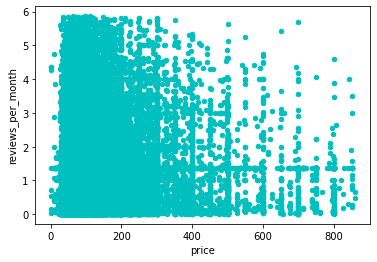

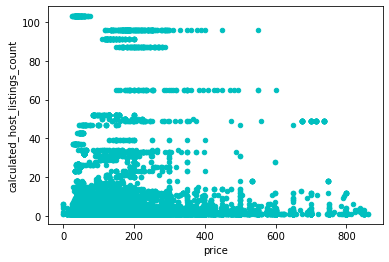

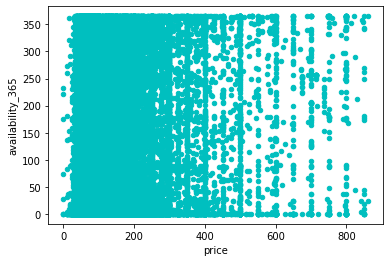

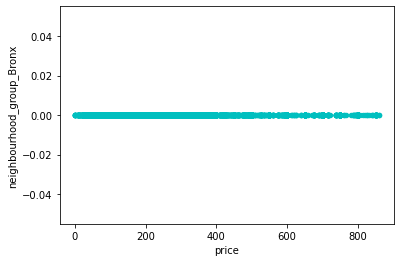

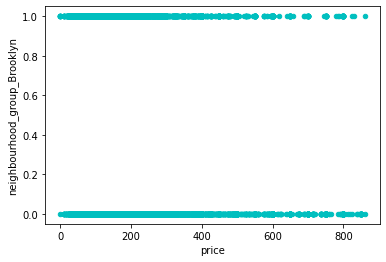

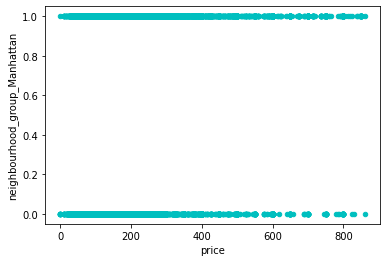

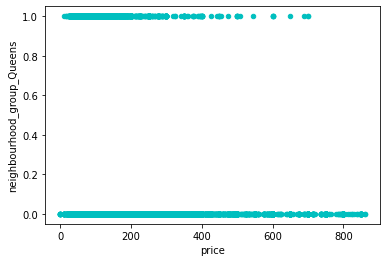

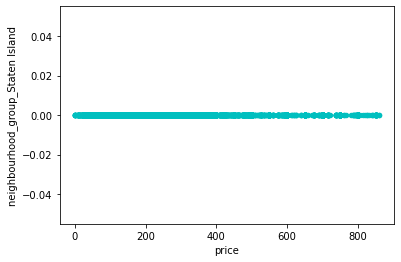

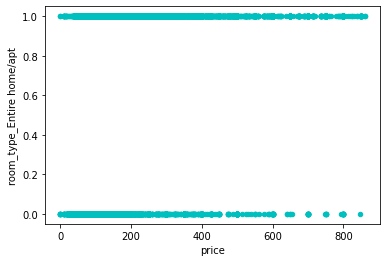

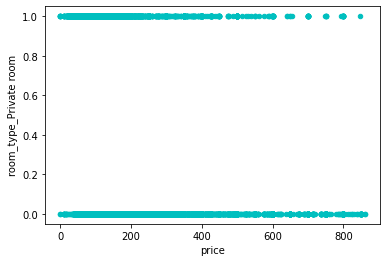

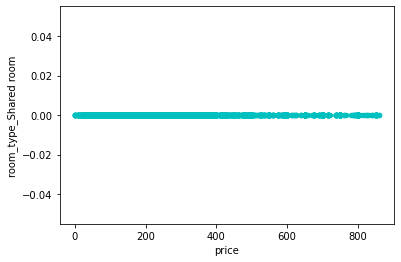

In [ ]:
for i in new_data.columns[2:]:# رسم نمودار قیمت و هر یک از ستون ها
  new_data.plot.scatter(x="price",y=i,c="c")

In [9]:
print(data["host_name"].value_counts())# تعداد اگهی مربوط به شخص
print(len(data["host_name"].value_counts()))

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11453, dtype: int64
11453


In [ ]:
data[data["number_of_reviews"]==data["number_of_reviews"].max()]["host_name"] # نام شخصی که بیشترین کامنت را دارد

11759    Dona
Name: host_name, dtype: object

In [10]:
from scipy.stats import pearsonr # استفاده از ضریب پیرسون

new_columns=new_data.columns

data1=new_data["price"]

data2=new_data[new_columns[2:]]
data2.drop("price",axis=1,inplace=True)

for i in data2.columns:

  stat, p = pearsonr(data1,data2[i])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print('price and {} probably independent'.format(i))
  else:
	  print('price and {} probably dependent'.format(i))


stat=0.123, p=0.000
price and neighbourhood probably dependent
stat=0.090, p=0.000
price and latitude probably dependent
stat=-0.315, p=0.000
price and longitude probably dependent
stat=0.007, p=0.167
price and minimum_nights probably independent
stat=-0.036, p=0.000
price and number_of_reviews probably dependent
stat=0.012, p=0.013
price and reviews_per_month probably dependent
stat=0.047, p=0.000
price and calculated_host_listings_count probably dependent
stat=0.125, p=0.000
price and availability_365 probably dependent
stat=nan, p=nan
price and neighbourhood_group_Bronx probably dependent
stat=-0.195, p=0.000
price and neighbourhood_group_Brooklyn probably dependent
stat=0.280, p=0.000
price and neighbourhood_group_Manhattan probably dependent
stat=-0.143, p=0.000
price and neighbourhood_group_Queens probably dependent
stat=nan, p=nan
price and neighbourhood_group_Staten Island probably dependent
stat=0.493, p=0.000
price and room_type_Entire home/apt probably dependent
stat=-0.493,

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [11]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

for i in data2.columns:

  stat, p = ttest_ind(data1, data2[i])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print('Probably the same distribution (price, {})'.format(i))
  else:
	  print('Probably different distributions (price, {})'.format(i))

stat=55.637, p=0.000
Probably different distributions (price, neighbourhood)
stat=191.903, p=0.000
Probably different distributions (price, latitude)
stat=409.805, p=0.000
Probably different distributions (price, longitude)
stat=257.092, p=0.000
Probably different distributions (price, minimum_nights)
stat=226.984, p=0.000
Probably different distributions (price, number_of_reviews)
stat=267.027, p=0.000
Probably different distributions (price, reviews_per_month)
stat=260.755, p=0.000
Probably different distributions (price, calculated_host_listings_count)
stat=49.426, p=0.000
Probably different distributions (price, availability_365)
stat=269.287, p=0.000
Probably different distributions (price, neighbourhood_group_Bronx)
stat=268.441, p=0.000
Probably different distributions (price, neighbourhood_group_Brooklyn)
stat=268.416, p=0.000
Probably different distributions (price, neighbourhood_group_Manhattan)
stat=269.097, p=0.000
Probably different distributions (price, neighbourhood_grou

In [12]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel

for i in data2.columns:

  stat, p = ttest_rel(data1, data2[i])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print('Probably the same distribution (price, {})'.format(i))
  else:
	  print('Probably different distributions (price, {})'.format(i))

stat=59.023, p=0.000
Probably different distributions (price, neighbourhood)
stat=191.912, p=0.000
Probably different distributions (price, latitude)
stat=409.764, p=0.000
Probably different distributions (price, longitude)
stat=257.232, p=0.000
Probably different distributions (price, minimum_nights)
stat=224.961, p=0.000
Probably different distributions (price, number_of_reviews)
stat=267.061, p=0.000
Probably different distributions (price, reviews_per_month)
stat=262.056, p=0.000
Probably different distributions (price, calculated_host_listings_count)
stat=52.794, p=0.000
Probably different distributions (price, availability_365)
stat=269.287, p=0.000
Probably different distributions (price, neighbourhood_group_Bronx)
stat=268.202, p=0.000
Probably different distributions (price, neighbourhood_group_Brooklyn)
stat=268.763, p=0.000
Probably different distributions (price, neighbourhood_group_Manhattan)
stat=268.991, p=0.000
Probably different distributions (price, neighbourhood_grou

In [13]:
# Example of the Mann-Whitney U Testfrom scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
for i in data2.columns:

  stat, p = mannwhitneyu(data1, data2[i])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print('Probably the same distribution (price, {})'.format(i))
  else:
	  print('Probably different distributions (price, {})'.format(i))

stat=741700635.000, p=0.000
Probably different distributions (price, neighbourhood)
stat=80537296.000, p=0.000
Probably different distributions (price, latitude)
stat=0.000, p=0.000
Probably different distributions (price, longitude)
stat=2304778.000, p=0.000
Probably different distributions (price, minimum_nights)
stat=78332504.500, p=0.000
Probably different distributions (price, number_of_reviews)
stat=338392.000, p=0.000
Probably different distributions (price, reviews_per_month)
stat=10641626.500, p=0.000
Probably different distributions (price, calculated_host_listings_count)
stat=584429618.500, p=0.000
Probably different distributions (price, availability_365)
stat=169196.000, p=0.000
Probably different distributions (price, neighbourhood_group_Bronx)
stat=244280.000, p=0.000
Probably different distributions (price, neighbourhood_group_Brooklyn)
stat=246504.000, p=0.000
Probably different distributions (price, neighbourhood_group_Manhattan)
stat=186000.000, p=0.000
Probably diff

In [14]:
# Example of the Mann-Whitney U Testfrom scipy.stats import ttest_rel
from scipy.stats import kruskal
for i in data2.columns:

  stat, p = kruskal(data1, data2[i])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print('Probably the same distribution (price, {})'.format(i))
  else:
	  print('Probably different distributions (price, {})'.format(i))

stat=1854.085, p=0.000
Probably different distributions (price, neighbourhood)
stat=52540.942, p=0.000
Probably different distributions (price, latitude)
stat=63451.175, p=0.000
Probably different distributions (price, longitude)
stat=63391.215, p=0.000
Probably different distributions (price, minimum_nights)
stat=52897.380, p=0.000
Probably different distributions (price, number_of_reviews)
stat=63470.645, p=0.000
Probably different distributions (price, reviews_per_month)
stat=64639.018, p=0.000
Probably different distributions (price, calculated_host_listings_count)
stat=7686.859, p=0.000
Probably different distributions (price, availability_365)
stat=72494.638, p=0.000
Probably different distributions (price, neighbourhood_group_Bronx)
stat=65544.049, p=0.000
Probably different distributions (price, neighbourhood_group_Brooklyn)
stat=65510.505, p=0.000
Probably different distributions (price, neighbourhood_group_Manhattan)
stat=69814.005, p=0.000
Probably different distributions (p

In [15]:
from sklearn.model_selection import train_test_split # تبدیل دیتای مورد نظر به دو بخش ترین و تست که سایز دیتای ست 20 درصد دیتای اصلیست
x_train ,x_test,y_train,y_test=train_test_split(data2,data1.values,test_size=0.2)
# print(x_train[0:5])
print(y_train[0:5])
# print(x_test[0:5])
print(y_test[0:5])




[150 121 250  65 200]
[249  55 100 125 229]


In [16]:
from sklearn.linear_model import LinearRegression# استفاده از رگرسیون خطی و برازش روی دیتای ترین
model=LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.3487881545044085


In [17]:
from sklearn.metrics import r2_score# پیش بینی مدل و بررسی دقت ان
y_hat=model.predict(x_test)
print(r2_score(y_test,y_hat))

0.34150722813606504
